# Introduction
This research project investigates key factors shaping the electric vehicle (EV) landscape, encompassing characteristics, pricing dynamics, and incentives eligibility. Through comprehensive analysis, it explores the variation in electric range among different EV makes and models, discerns the relationship between base MSRP and electric range, tracks the evolution of electric range over model years, discerns differences in electric range across vehicle types, and examines the impact of vehicle age on Clean Alternative Fuel Vehicle (CAFV) status eligibility. By providing valuable insights for consumers, manufacturers, and policymakers, the project aims to inform decision-making processes, foster innovation, and facilitate the transition to cleaner transportation alternatives.

# Data Description
Data about Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

**Type**
Population

**Size**
3384 rows, 16 variables 

**Description**
This dataset provides information about Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) registered through the Washington State Department of Licensing (DOL). It includes details such as the Vehicle Identification Number (VIN), country of manufacture, city of the manufacturing company, postal code, model year, make and model of the vehicle, type of electric vehicle, alternative fuel used, electric range, base Manufacturer’s Suggested Retail Price (MSRP), legislative district, DOL Vehicle ID, vehicle location, electric utility, and 2020 Census Tract. The dataset is updated annually and is licensed under the ODC Public Domain Dedication and Licence (PDDL). It can be used for data analytics and visualization projects related to automobiles and vehicles.

**Source:**
Washington State Department of Licensing (DOL)
https://catalog.data.gov/dataset/electric-vehicle-population-data

**Variables**
Summary of variables (columns):
- Model Year: The year the electric vehicle was manufactured.
- Make: The manufacturer of the electric vehicle.
- Model: The specific model of the electric vehicle.
- Electric Vehicle Type: When talking about EVs, we generally refer to three main types of electric vehicles: hybrid electric vehicles (HEV), plug-in hybrid electric vehicles (PHEV), and battery electric vehicles (BEV).
- Clean Alternative Fuel Vehicle (CAFV) Eligibility: Indicates if the vehicle is eligible for Clean Alternative Fuel Vehicle status. Vegetable oils, such as palm, soybean, sunflower, peanut, and olive, as alternative fuels can be used for diesel engines. As an alternative fuel, vegetable oil is one of the renewable fuels.
- Electric Range: The electric range of the vehicle in miles.
- Base MSRP: The Manufacturer's Suggested Retail Price (MSRP) of the vehicle in US Dollars.
- Age: The age of the vehicle in years.
- Type: The type of vehicle (e.g., sedan, hatchback).

From the orginal dataset I have removed these columns: VIN (1-10), County, City, State, Postal Code, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, and 2020 Census Tract. The reason for the removal was because they lacked any insight into solving the research question.



In [98]:
#Import Dataset and put into Dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')


In [99]:
#Dimensions of Datset
df.shape

(3377, 17)

In [100]:
#First 10 Observations
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1CN3D,Thurston,Olympia,WA,98501.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,22.0,182783100,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
1,5YJSA1H13E,Spokane,Spokane,WA,99204.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,3.0,142213004,POINT (-117.43167 47.64724),MODERN ELECTRIC WATER COMPANY,5.306300e+10
2,5YJSA1H13E,King,Kirkland,WA,98034.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,45.0,184591088,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
3,5YJSA1H14E,King,Covington,WA,98042.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,47.0,148139015,POINT (-122.111625 47.36078),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,KNDJX3AE4G,King,Seattle,WA,98133.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,3195,32.0,153963589,POINT (-122.34584 47.76726),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [101]:
#Copy of Dataframe for Data Manipulation
df_copy = df.copy()
df_copy.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1CN3D,Thurston,Olympia,WA,98501.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,22.0,182783100,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
1,5YJSA1H13E,Spokane,Spokane,WA,99204.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,3.0,142213004,POINT (-117.43167 47.64724),MODERN ELECTRIC WATER COMPANY,5.306300e+10
2,5YJSA1H13E,King,Kirkland,WA,98034.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,45.0,184591088,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
3,5YJSA1H14E,King,Covington,WA,98042.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,47.0,148139015,POINT (-122.111625 47.36078),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,KNDJX3AE4G,King,Seattle,WA,98133.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,3195,32.0,153963589,POINT (-122.34584 47.76726),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


# Data Quality 
From what I can tell, for the columns values are pretty clean. Everything is standardized. Of the columns which I plan to use, none of them have missing values. Additionally, I checked for any Any Misspelling of Categorial Data and found none. Lastly I checked for Outliars in Numberical Data and found that out of the 3377 rows, 221 of them have outliars. The code for checking the data quality is shown below.

I would like to create a new columns, relating to the age of the cars by using the 'Model Year' column to mathematically do it. I may want to create another category of the car for the type car, such as 'sudan', 'suv', 'minivan', by using the Model Column

In [102]:
# Check for missing values
print("Missing values for column Model Year:")
print(df_copy['Model Year'].isnull().sum())
print()

print("Missing values for column Make:")
print(df_copy['Make'].isnull().sum())
print()

print("Missing values for column Model:")
print(df_copy['Model'].isnull().sum())
print()

print("Missing values for column Electric Vehicle Type:")
print(df_copy['Electric Vehicle Type'].isnull().sum())
print()

print("Missing values for column Clean Alternative Fuel Vehicle (CAFV) Eligibility:")
print(df_copy['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].isnull().sum())
print()

print("Missing values for column Electric Range:")
print(df_copy['Electric Range'].isnull().sum())
print()

print("Missing values for column Base MSRP:")
print(df_copy['Base MSRP'].isnull().sum())

Missing values for column Model Year:
0

Missing values for column Make:
0

Missing values for column Model:
0

Missing values for column Electric Vehicle Type:
0

Missing values for column Clean Alternative Fuel Vehicle (CAFV) Eligibility:
0

Missing values for column Electric Range:
0

Missing values for column Base MSRP:
0


In [103]:
#Find Any Misspelling of Categorial Data:
print("Unique values for column Model Year:")
print(df_copy['Model Year'].unique())
print()

print("Unique values for column Make:")
print(df_copy['Make'].unique())
print()

print("Unique values for column Model:")
print(df_copy['Model'].unique())
print()

print("Unique values for column Electric Vehicle Type:")
print(df_copy['Electric Vehicle Type'].unique())
print()

print("Unique values for column Clean Alternative Fuel Vehicle (CAFV) Eligibility:")
print(df_copy['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique())

Unique values for column Model Year:
[2013 2014 2016 2019 2017 2018 2012 2008 2011 2010 2020 2015]

Unique values for column Make:
['TESLA' 'KIA' 'BMW' 'MINI' 'VOLVO' 'PORSCHE' 'CADILLAC' 'SUBARU'
 'CHRYSLER' 'FISKER' 'WHEEGO ELECTRIC CARS']

Unique values for column Model:
['MODEL S' 'SOUL' '530E' '740E' 'SOUL EV' '330E' 'COUNTRYMAN' 'XC90'
 'XC60' 'PANAMERA' 'ROADSTER' 'CT6' 'CROSSTREK' 'PACIFICA' 'KARMA'
 'CAYENNE' 'WHEEGO' '918']

Unique values for column Electric Vehicle Type:
['Battery Electric Vehicle (BEV)' 'Plug-in Hybrid Electric Vehicle (PHEV)']

Unique values for column Clean Alternative Fuel Vehicle (CAFV) Eligibility:
['Clean Alternative Fuel Vehicle Eligible'
 'Not eligible due to low battery range']


In [104]:
#Finding Outliars in Numberical Data
Q1 = df_copy['Electric Range'].quantile(0.25)
Q3 = df_copy['Electric Range'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outlier_electrical_range = df_copy[(df_copy['Electric Range'] < lower_bound) | (df_copy['Electric Range'] > upper_bound)]

# Print outliers
print("Outliers in column", 'Electric Range', ":")
print(outlier_electrical_range)


Outliers in column Electric Range :
Empty DataFrame
Columns: [VIN (1-10), County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, 2020 Census Tract]
Index: []


In [105]:
Q1 = df_copy['Base MSRP'].quantile(0.25)
Q3 = df_copy['Base MSRP'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outlier_base_msrp = df_copy[(df_copy['Base MSRP'] < lower_bound) | (df_copy['Base MSRP'] > upper_bound)]

# Print outliers
print("Outliers in column", 'Base MSRP', ":")
print(outlier_base_msrp['Base MSRP'])

Outliers in column Base MSRP :
8        9125
62       9895
97       7595
105     34995
131     39995
        ...  
3323    39995
3338    34995
3355    34995
3356    34995
3369    39995
Name: Base MSRP, Length: 221, dtype: int64


# Data Moves
**Selecting:** Initially, I selected specific columns from the DataFrame (df_copy) that are relevant to the course or analysis. These columns include 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', and 'Base MSRP'. This step is aimed at focusing the DataFrame on essential information.

**Calculating**: Next, I created a new column named 'Age' to represent the age of the vehicles. This column calculates the age of each vehicle by subtracting its 'Model Year' from the reference year 2023.

**Grouping:** Another new column named 'Type' was created to categorize vehicles based on their models. I defined a function assign_car_type to assign a vehicle type based on its model. This function utilizes model-specific criteria to categorize vehicles into types such as SUV, Sedan, Sports Car, Hatchback, or Unknown.

In [106]:
# Remove outliers
df_copy = df_copy[(df_copy['Base MSRP'] >= lower_bound) & (df_copy['Base MSRP'] <= upper_bound)]
df_copy.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1CN3D,Thurston,Olympia,WA,98501.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,22.0,182783100,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
1,5YJSA1H13E,Spokane,Spokane,WA,99204.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,3.0,142213004,POINT (-117.43167 47.64724),MODERN ELECTRIC WATER COMPANY,5.306300e+10
2,5YJSA1H13E,King,Kirkland,WA,98034.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,45.0,184591088,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
3,5YJSA1H14E,King,Covington,WA,98042.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,47.0,148139015,POINT (-122.111625 47.36078),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,KNDJX3AE4G,King,Seattle,WA,98133.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,3195,32.0,153963589,POINT (-122.34584 47.76726),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [107]:
#Selecting Certain Columns So It Makes Dataframe Easier to Look At and Only Use Data Relevent to the Course
selected_columns = df_copy[['Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP']]
df_copy = df_copy[['Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP']]
df_copy.head()

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699
1,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699
2,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699
3,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699
4,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,3195


In [108]:
#Create a New Column Called Age to use for Future Data Visualization
df_copy['Age'] = 2023-df_copy['Model Year']
df_copy.head()

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Age
0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,10
1,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,9
2,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,9
3,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,9
4,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,3195,7


In [109]:
#Create a New Column called Type to use for Future Data Visualization 

#print(df_copy['Model'].unique().tolist())
def assign_car_type(model):
    if model in ['COUNTRYMAN','XC90', 'XC60', 'CROSSTREK', 'PACIFICA', 'CAYENNE']:
        return 'SUV'
    elif model in ['MODEL S', '530E', '740E', '330E', 'PANAMERA', 'CT6', 'KARMA']:
        return 'Sedan'
    elif model in ['ROADSTER', '918']:
        return 'Sports Car'
    elif model in ['SOUL','SOUL EV']:
        return 'Hatchback'
    else:
        return 'Unknown'

df_copy['Type'] = df_copy['Model'].apply(assign_car_type)

df_copy.head()

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Age,Type
0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,10,Sedan
1,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,9,Sedan
2,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,9,Sedan
3,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,699,9,Sedan
4,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,3195,7,Hatchback


# Research Questions

**General Research Question:** What factors influence electric vehicle characteristics, pricing, and eligibility for incentives?

**Research Question 1:**
How does the electric range of electric vehicles vary across different makes and models?

**Value of the Question:**
Understanding the variation in electric range among different makes and models of electric vehicles can help consumers make informed decisions when choosing a vehicle that meets their driving needs.
It can also provide insights for manufacturers to improve their products and for policymakers to assess the effectiveness of regulations promoting electric vehicle adoption.

**Variables Used:**
- Independent Variables: Make, Model 
- Dependent Variable: Electric Range

**Operations Needed:**
Filter the dataset to include relevant columns (Make, Model, Electric Range). Group the data by make and model, then calculate summary statistics (mean, median, minimum, maximum) for electric range within each make and model. 
Visualize the distribution of electric range across different makes and models using a box plot or bar chart.

**Research Question 2:**
Is there a relationship between the base MSRP and electric range of electric vehicles?

**Value of the Question:**
Understanding the relationship between the base MSRP and electric range of electric vehicles can provide insights into the pricing strategies of manufacturers and the perceived value of electric range by consumers. 
This information can help consumers make cost-effective decisions and assist policymakers in designing incentives to promote the adoption of electric vehicles.

**Variables Used:**
- Independent Variable: Base MSRP 
- Dependent Variable: Electric Range 

**Operations Needed:**
Conduct a scatter plot analysis to visualize the relationship between base MSRP and electric range. Calculate the correlation coefficient to quantify the strength and direction of the relationship. 

**Research Question 3:**
How has the electric range of electric vehicles evolved over different model years?

**Value of the Question:**
Understanding how the electric range of electric vehicles has changed over time provides insights into technological advancements and improvements in battery technology. 
This information can help consumers anticipate future developments and assist policymakers and manufacturers in setting benchmarks for performance and innovation.

**Variables Used:**
- Independent Variable: Model Year
- Dependent Variable: Electric Range

**Operations Needed:**
Group the data by model year and calculate summary statistics (mean, median, minimum, maximum) for electric range within each year. Visualize the trend in electric range over different model years using a line plot.
Additionally, analyze any significant changes or advancements in electric range over time.

**Research Question 4:**
Are there differences in the electric range of electric vehicles based on vehicle type?

**Value of the Question:**
Understanding how electric range varies across different vehicle types can help consumers choose the type of electric vehicle that best suits their needs and lifestyle.
It can also provide insights for manufacturers to tailor their product offerings to meet market demand and regulatory requirements.

**Variables Used:**
- Independent Variable: Type 
- Dependent Variable: Electric Range 

**Operations Needed:**
Group the data by vehicle type and calculate summary statistics (mean, median, minimum, maximum) for electric range within each type. Visualize the distribution of electric range across different vehicle types using a box plot.
Additionally, compare the average electric range among vehicle types to identify any significant differences.

**Research Question 5:**
Does the age of electric vehicles influence their eligibility for Clean Alternative Fuel Vehicle (CAFV) status?

**Value of the Question:**
Understanding how the age of electric vehicles affects their eligibility for Clean Alternative Fuel Vehicle (CAFV) status can provide insights into the regulatory framework and incentives for promoting the adoption of clean vehicles. This information can help policymakers assess the effectiveness of eligibility criteria and determine if adjustments are needed to encourage the adoption of newer, cleaner vehicles.

**Variables Used:**
- Independent Variable: Age 
- Dependent Variable: Clean Alternative Fuel Vehicle (CAFV) Eligibility

**Operations Needed:**
Group the data by age categories (e.g., <5 years old, 5-10 years old, >10 years old) and calculate the percentage of electric vehicles within each age category that are eligible for CAFV status. Visualize the proportion of eligible and ineligible vehicles across different age categories using a bar chart.

# Research Findings

**Research Question 1:** How does the electric range of electric vehicles vary across different makes and models?

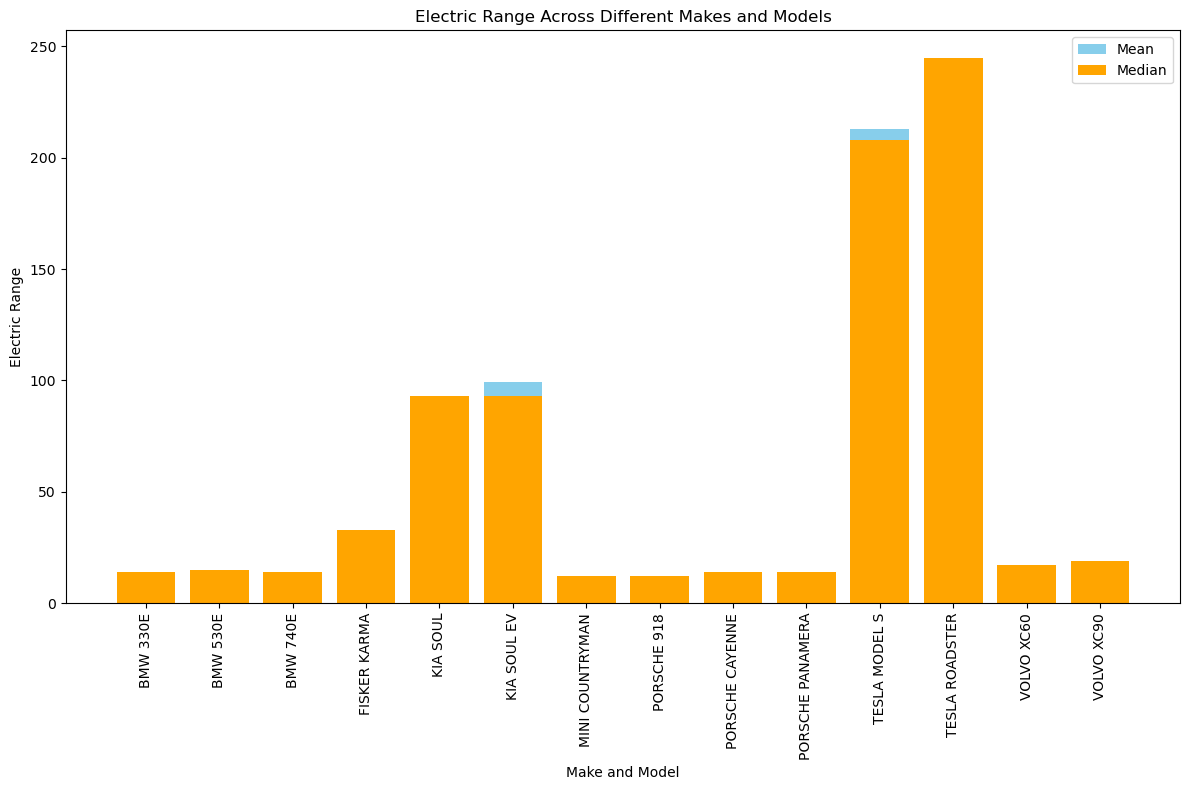

In [110]:
import matplotlib.pyplot as plt
df_filtered = df_copy[['Make', 'Model', 'Electric Range']]

# Group the data by make and model, then calculate summary statistics
summary_stats = df_filtered.groupby(['Make', 'Model'])['Electric Range'].agg(['mean', 'median', 'min', 'max']).reset_index()

# Visualize the distribution of electric range across different makes and models
plt.figure(figsize=(12, 8))
plt.bar(summary_stats['Make'] + ' ' + summary_stats['Model'], summary_stats['mean'], color='skyblue', label='Mean')
plt.bar(summary_stats['Make'] + ' ' + summary_stats['Model'], summary_stats['median'], color='orange', label='Median')
plt.xlabel('Make and Model')
plt.ylabel('Electric Range')
plt.title('Electric Range Across Different Makes and Models')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

**Graph Explanation:** This graph compares the electric range, in miles, of different car models. The bars represent car models from various manufacturers like BMW, Tesla, Porsche, and more. There are two types of bars for each model, one showing the mean (average) range and the other showing the median (middle) range. 

**Research Question 2:** Is there a relationship between the base MSRP and electric range of electric vehicles?

/opt/tljh/user/envs/DSC201/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/envs/DSC201/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


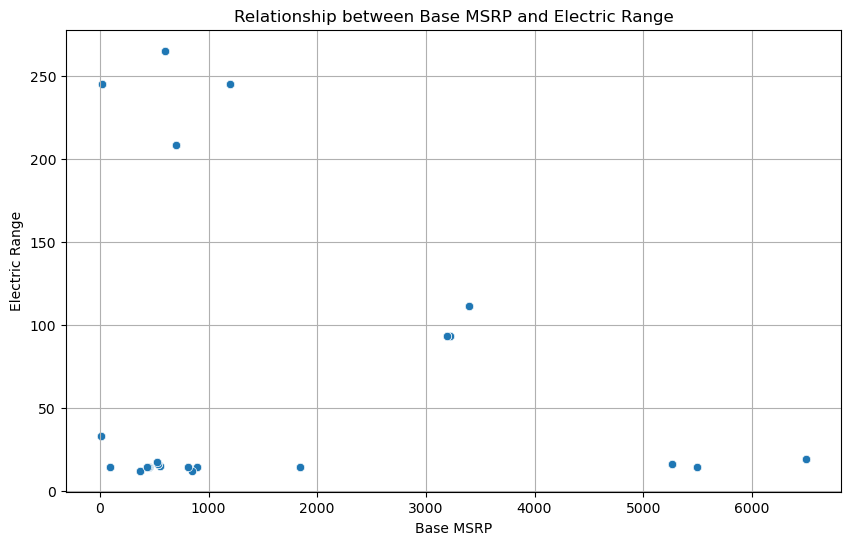

Correlation Coefficient: -0.4088680710750346


In [111]:
# Filter relevant columns (Base MSRP, Electric Range)
df_filtered = df_copy[['Base MSRP', 'Electric Range']]



# Conduct scatter plot analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Base MSRP', y='Electric Range', data=df_filtered)
plt.xlabel('Base MSRP')
plt.ylabel('Electric Range')
plt.title('Relationship between Base MSRP and Electric Range')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = df_filtered['Base MSRP'].corr(df_filtered['Electric Range'])
print("Correlation Coefficient:", correlation_coefficient)


**Graph Explanation:** This scatter plot shows the relationship between the base Manufacturer’s Suggested Retail Price (MSRP) and the electric range of various cars. The base MSRP is shown on the x-axis, and the electric range in miles is on the y-axis. Each blue dot represents a specific car model.

**Research Question 3:** How has the electric range of electric vehicles evolved over different model years?

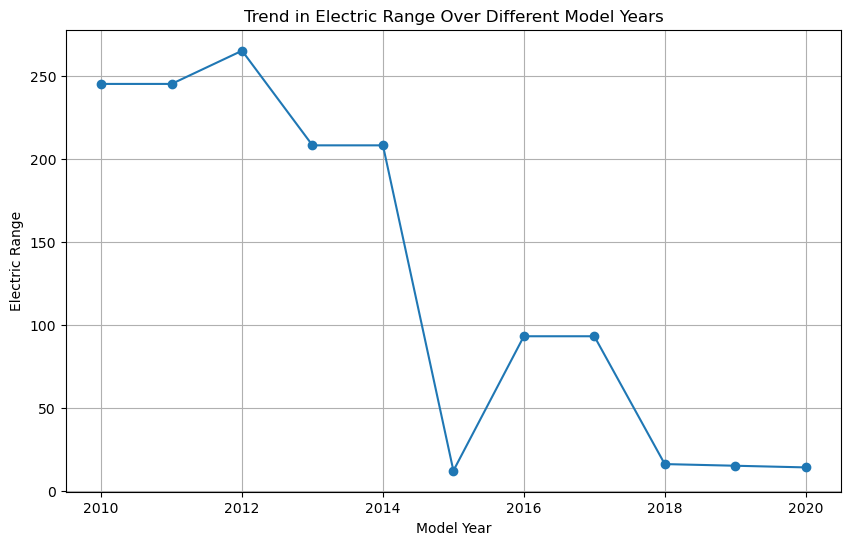

    Model Year        mean  median  min  max
0         2010  245.000000   245.0  245  245
1         2011  245.000000   245.0  245  245
2         2012  243.760563   265.0   33  265
3         2013  208.000000   208.0  208  208
4         2014  208.000000   208.0  208  208
5         2015   12.000000    12.0   12   12
6         2016   90.777494    93.0   14   93
7         2017   59.095833    93.0   14   93
8         2018   26.137670    16.0   12  111
9         2019   14.659420    15.0   12   17
10        2020   14.000000    14.0   14   14


In [112]:
# Filter relevant columns (Model Year, Electric Range)
df_filtered = df_copy[['Model Year', 'Electric Range']]

# Group the data by model year and calculate summary statistics
summary_stats = df_filtered.groupby('Model Year')['Electric Range'].agg(['mean', 'median', 'min', 'max']).reset_index()

# Visualize the trend in electric range over different model years
plt.figure(figsize=(10, 6))
plt.plot(summary_stats['Model Year'], summary_stats['median'], marker='o', linestyle='-')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.title('Trend in Electric Range Over Different Model Years')
plt.grid(True)
plt.show()

# Analyze significant changes or advancements in electric range over time
# You can inspect the summary_stats DataFrame to identify any trends or patterns
print(summary_stats)

**Graph Explanation:** This graph shows the relationship between the base Manufacturer’s Suggested Retail Price (MSRP) and the electric range of various cars. The base MSRP is shown on the x-axis, and the electric range in miles is on the y-axis. Each blue dot represents a specific car model.

**Research Question 4:** Are there differences in the electric range of electric vehicles based on vehicle type?

/opt/tljh/user/envs/DSC201/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/envs/DSC201/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/envs/DSC201/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


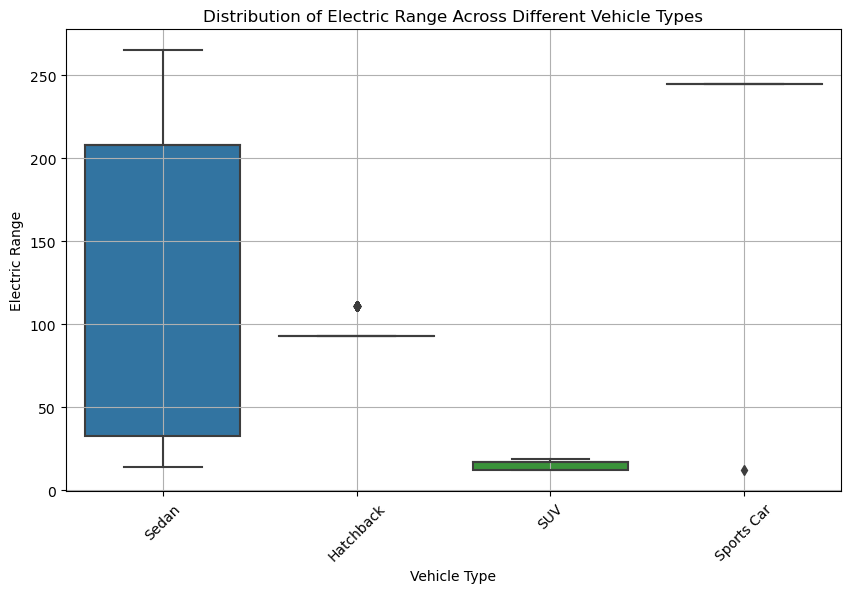


Average Electric Range by Vehicle Type:
         Type        mean  median  min  max
0   Hatchback   95.253807    93.0   93  111
1         SUV   15.581109    17.0   12   19
2       Sedan  162.172111   208.0   14  265
3  Sports Car  236.370370   245.0   12  245


In [113]:
# Filter relevant columns (Type, Electric Range)
df_filtered = df_copy[['Type', 'Electric Range']]

# Group the data by vehicle type and calculate summary statistics
summary_stats = df_filtered.groupby('Type')['Electric Range'].agg(['mean', 'median', 'min', 'max']).reset_index()

# Visualize the distribution of electric range across different vehicle types using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Electric Range', data=df_filtered)
plt.xlabel('Vehicle Type')
plt.ylabel('Electric Range')
plt.title('Distribution of Electric Range Across Different Vehicle Types')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Compare the average electric range among vehicle types
print("\nAverage Electric Range by Vehicle Type:")
print(summary_stats)

**Graph Explanation:** This graph shows the electric range of different types of vehicles: sedan, hatchback, SUV, and sports car. The electric range is shown on the y-axis, and the vehicle types are on the x-axis. 

**Research Question 5:** Does the age of electric vehicles influence their eligibility for Clean Alternative Fuel Vehicle (CAFV) status?

/tmp/ipykernel_2302606/3299153788.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Age Category'] = pd.cut(df_filtered['Age'], bins=age_bins, labels=age_labels)
/tmp/ipykernel_2302606/3299153788.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cafv_percentage = df_filtered.groupby('Age Category')['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].apply(lambda x: (x == 'Clean Alternative Fuel Vehicle Eligible').mean() * 100)


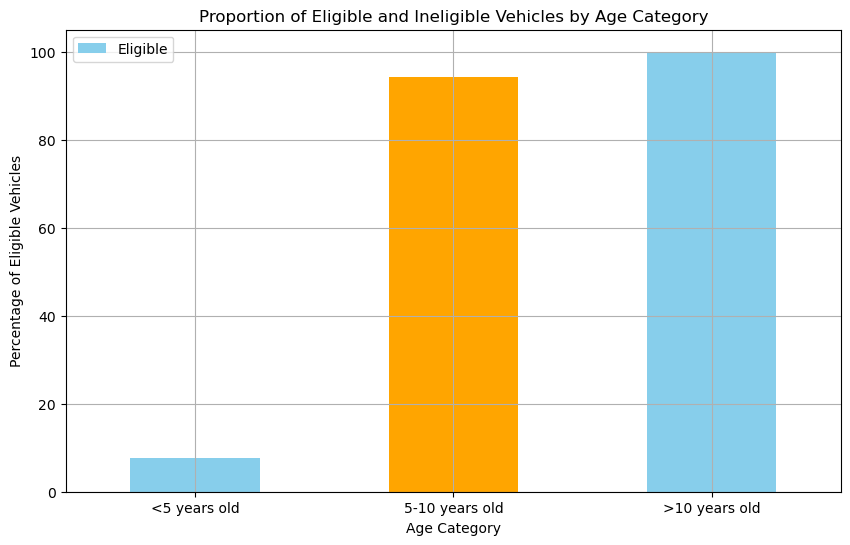

In [116]:
# Filter relevant columns (Age, CAFV Eligibility)
df_filtered = df_copy[['Age', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']]

# Define age categories
age_bins = [0, 5, 10, float('inf')]
age_labels = ['<5 years old', '5-10 years old', '>10 years old']

# Categorize vehicles into age categories
df_filtered['Age Category'] = pd.cut(df_filtered['Age'], bins=age_bins, labels=age_labels)

# Calculate the percentage of eligible vehicles within each age category
age_cafv_percentage = df_filtered.groupby('Age Category')['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].apply(lambda x: (x == 'Clean Alternative Fuel Vehicle Eligible').mean() * 100)

# Visualize the proportion of eligible and ineligible vehicles across different age categories
plt.figure(figsize=(10, 6))
age_cafv_percentage.plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Age Category')
plt.ylabel('Percentage of Eligible Vehicles')
plt.title('Proportion of Eligible and Ineligible Vehicles by Age Category')
plt.xticks(rotation=0)
plt.legend(['Eligible', 'Not Eligible'])
plt.grid(True)
plt.show()

**Graph Explanation:** This graph shows the eligibility of vehicles based on their age. The age of the vehicles is divided into three categories: less than 5 years old, between 5-10 years old, and more than 10 years old. 

# Discussion

**Research Question 1:**

**Primary Insights**:
- There are significant variations in the electric range among different car makes and models.
- The Tesla Model S has the highest mean electric range, significantly outperforming others.

**Limitations of this Analysis could include:**
- Lack of information on how these ranges were measured.
- The conditions under which these measurements were taken are not specified.
- It’s unclear whether these are real-world figures or manufacturer’s estimates.

**Potential goals for Future Analysis:**
- Include more diverse models and makes of electric vehicles.
- Consider real-world testing data for electric range under various conditions (like weather, terrain).

**Research Question 2:**

**Primary Insights**:
- There is no clear correlation between the Base MSRP (Manufacturer’s Suggested Retail Price) and Electric Range of the vehicles represented by the blue dots.
- Vehicles with both low and high electric ranges can have varying prices.

**Limitations of this Analysis could include:**
- A small sample size, which may not be representative of the entire population of electric vehicles.
- Lack of trend line or statistical analysis to quantify the relationship between the two variables.

**Potential goals for Future Analysis:**
- Include more data points to have a more comprehensive view of the market.
- Incorporate other variables like features or brand reputation, which could also influence the price.

**Research Question 3:**

**Primary Insights**:
- The electric range of a certain product or vehicle increased significantly from 2010 to around 2013.
- There was a drastic decline in the electric range from around 2013 to 2016.
- After 2016, there was a slight increase before it stabilized from 2018 to 2020.

**Limitations of this Analysis could include:**
- No context about what product or vehicle’s electric range is being represented.

**Potential goals for Future Analysis:**
- Include context or categories of the products or vehicles being analyzed to offer clearer insights.

**Research Question 4:**

**Primary Insights**:
- Sedans have a significantly higher electric range compared to hatchbacks, SUVs, and sports cars.

**Limitations of this Analysis could include:**
- Absence of information on how the electric range was measured or calculated.

**Potential goals for Future Analysis:**
- Consider additional vehicle types.
- Explore factors influencing electric range.

**Research Question 5:**

**Primary Insights**:
- A small proportion of vehicles less than 5 years old are eligible.
- All vehicles aged between 5-10 years are ineligible.
- A significant majority of vehicles older than 10 years are eligible.

**Limitations of this Analysis could include:**
- Absence of information on the criteria determining eligibility.

**Potential goals for Future Analysis:**
- Explore the factors contributing to eligibility and ineligibility across different age categories of vehicles.

**Overall Insight From Project:**

Different car models have varying electric ranges, with the Tesla Model S standing out for its high range. However, the methods and conditions for measuring these ranges are unclear. There's no obvious connection between a vehicle's price and its electric range, as both low-priced and high-priced cars can have different ranges. Over time, a certain product or vehicle's electric range increased significantly from 2010 to 2013, dropped drastically until 2016, then slightly increased and stabilized from 2018 to 2020, but it's unclear what product or vehicle this data represents. Sedans tend to have a higher electric range compared to other vehicle types like hatchbacks, SUVs, and sports cars, but the measurement methods are unclear. Lastly, eligibility varies with vehicle age, with few vehicles less than 5 years old being eligible, all vehicles aged 5-10 years being ineligible, and most vehicles older than 10 years being eligible, but the criteria for eligibility are not specified. Future analysis could provide more clarity and context in all these areas.


# Reflection:
**Data Science and Programing Skills Gained From Project:**
- Data Importing: The dataset was imported into a pandas DataFrame using the pd.read_csv() function.
- Data Cleaning: The original dataset was cleaned by removing unnecessary columns.
- Data Exploration: The shape of the dataset was explored using the df.shape attribute, and the first few observations were viewed using the df.head() function.
- Data Analysis: The project involved comprehensive analysis of the electric vehicle landscape, including exploring the variation in electric range among different EV makes and models, discerning the relationship between base MSRP and electric range, tracking the evolution of electric range over model years, discerning differences in electric range across vehicle types, and examining the impact of vehicle age on Clean Alternative Fuel Vehicle (CAFV) status eligibility.
- Data Visualization: The use of matplotlib and seaborn libraries suggests that data visualization techniques were likely used to better understand the data and present findings.
- Library Importing: Use of libraries such as pandas, numpy, matplotlib, and seaborn.
- Communication: The project demonstrates the ability to effectively communicate findings and insights derived from the data analysis. 